In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q = "SELECT * FROM facts"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


In [4]:
q_min_population = "SELECT MIN(population) FROM facts;"
q_max_population = "SELECT MAX(population) FROM facts;"
q_min_population_growth = "SELECT MIN(population_growth) FROM facts;"
q_max_population_growth = "SELECT MAX(population_growth) FROM facts;"

In [5]:
pd.read_sql_query(q_min_population, conn)
pd.read_sql_query(q_max_population, conn)
pd.read_sql_query(q_min_population_growth, conn)
pd.read_sql_query(q_max_population_growth, conn)

,MAX(population_growth)
0,4.02


In [6]:
q = "select name from facts where population=0;"
pd.read_sql_query(q, conn)

,name
0,Antarctica


In [7]:
q = "select name from facts where population=(SELECT MAX(population) FROM facts);"
pd.read_sql_query(q, conn)

,name
0,World


Looking into the population with the extreme numbers, we found that Antarctica has no residence and the world has more than 7 billion people. This makes total sense. However, we should probably exclude these two from further analysis. 

In [8]:
q = "select population, population_growth, birth_rate, death_rate from facts where name NOT IN ('Antarctica', 'World');"

res = pd.read_sql_query(q, conn)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa5c7b8>,
      dtype=object)

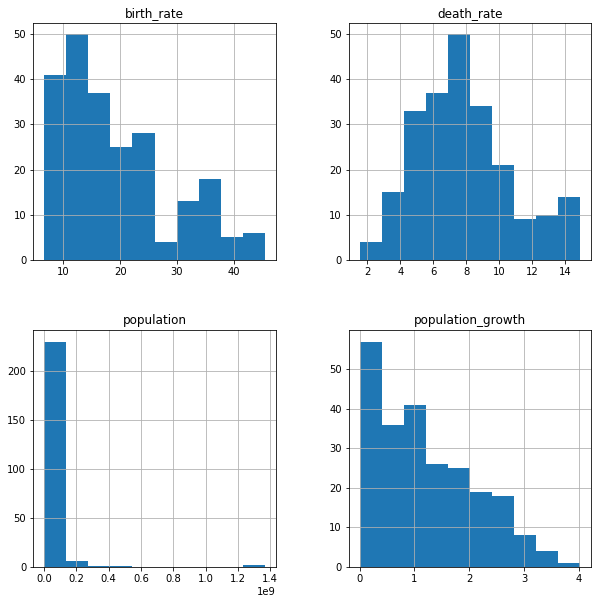

In [3]:

# n_bins = 10

# fig, axes = plt.subplots(nrows=2, ncols=2)
# ax0, ax1, ax2, ax3 = axes.flatten()

# ax0.hist(res0, n_bins, density=True, histtype='bar')
# ax0.legend(prop={'size': 10})
# ax0.set_title('bars with legend - population')

# ax1.hist(res1, n_bins, density=True, histtype='bar', stacked=True)
# ax1.set_title('stacked bar - population growth')

# ax2.hist(res2, n_bins, histtype='step', stacked=True, fill=False)
# ax2.set_title('birth rate')

# ax3.hist(res3, n_bins, histtype='step', stacked=False, fill=False)
# ax3.set_title('death rate')

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

# plt.show()



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q, conn).hist(ax=ax)

In [13]:
pip install seaborn


  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/04/66/ec5f1283d6a290a9153881a896837487338c44639c1305cc59e1c7b69cc9/scipy-1.3.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Note: you may need to restart the kernel to use updated packages.
